# Case_00 Just simple monomer binding

$$\frac{dA}{dt}= k_2 mRNA + k_{off} C_1 - (p_{tot2} - C_1) A k_{on}- \delta A$$

$$\frac{dmRNA}{dt}= \alpha + kS p_{tot} - \delta_2 mRNA$$

$$\frac{dC_1}{dt}= (p_{tot2} - C_1) k_{on} A - k_{off} C_1 - \delta_3 C_1$$

Where: A is the TF, $C_1$ is the complex between A and its cognate binding site, $p_{tot2}$ is the downstream cognate binding site  and mRNA is the mRNA from where A is produced

In [24]:
#Import needed libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline


from scipy.integrate import odeint

# Total A

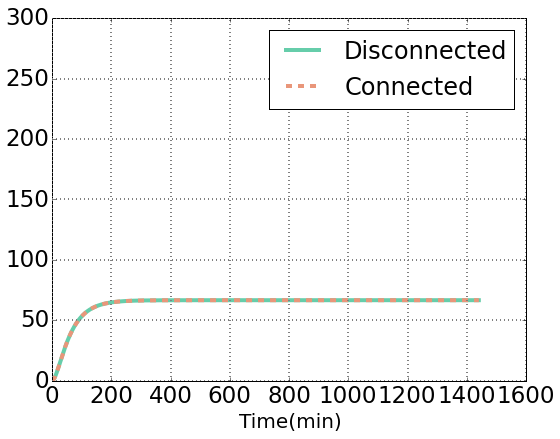

In [25]:
#Time interval to use
t=np.arange(0,1440,0.01)
from pylab import *
#Parameters
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3;
k=0.09/50; k2=0.8; a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5
kon2=kon;koff2=koff;
ptot2=300
d4=0.02

#Disconnected case ODEs and xo
xo = [0, 0]
def f_1_50(x,t): 
    return (((k2*x[1]))-d*x[0],
            a+k*S-d2*x[1],)
soln_1_50=odeint(f_1_50,xo,t)

#Connected case ODEs and xo
xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d4*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)

#Plotting parameters
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
########################

#Things to plot
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)
########################

#fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_zero_00_S_50_deg.eps',format="eps")
show()

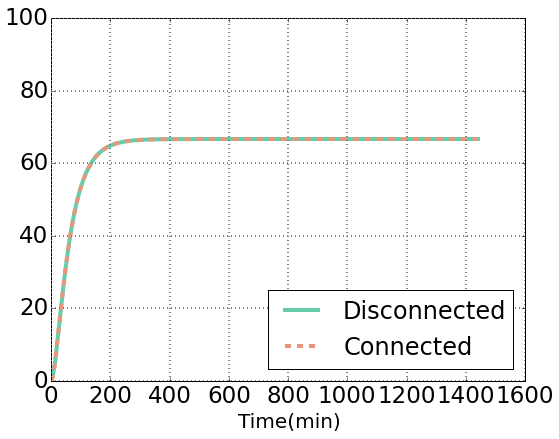

In [26]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23)
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=4)
fig.savefig('Total_A_zero_00_S_50_deg_100_scale.eps',format="eps")
show()

/Users/LPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


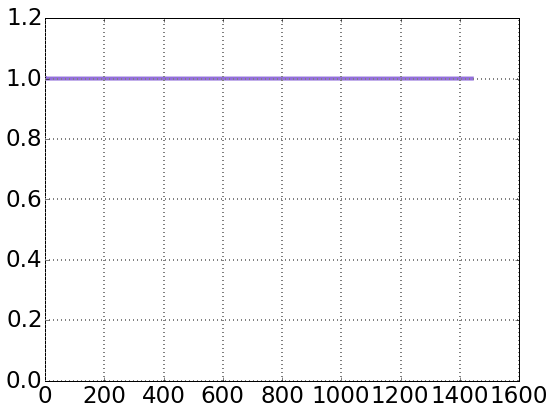

In [27]:
#Ratio between both
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/(soln_1_50[:,0])
a1=cosa
pylab.ylim([0,1.2])
plot(t,cosa, color = '#9370db', lw=4)
#xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_00_S_50_deg_ratio.eps',format="eps")
show()

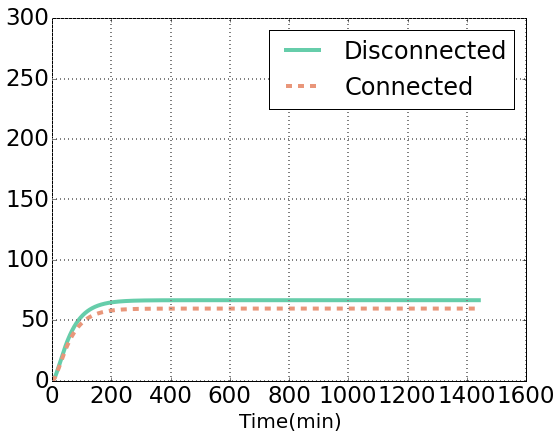

In [28]:
#Plotting only potentially functional TF(free and able to bind)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Functional_A_zero_00_S_50_deg.eps',format="eps")
show()

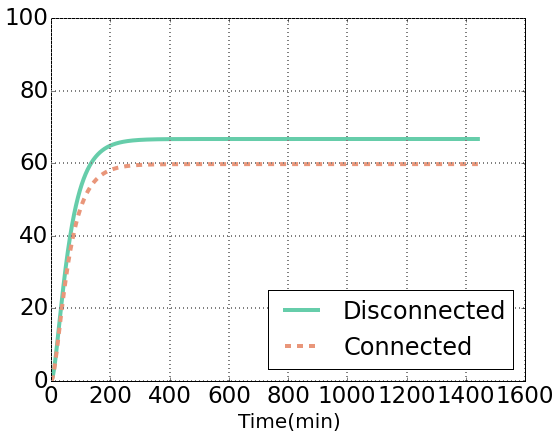

In [29]:
#Plotting only potentially functional TF(free and able to bind) scaled to 100
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=4)
fig.savefig('Functional_A_zero_00_S_50_deg_100_scale.eps',format="eps")
show()

/Users/LPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


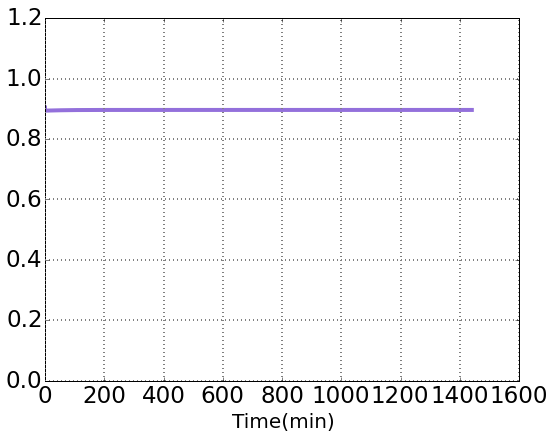

In [30]:
#Ratio in the functional case
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0])/(soln_1_50[:,0])
c1=cosa
pylab.ylim([0,1.2])
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Functional_A_00_S_50_deg_ratio.eps',format="eps")
show()

# Total A with kon=100*kon

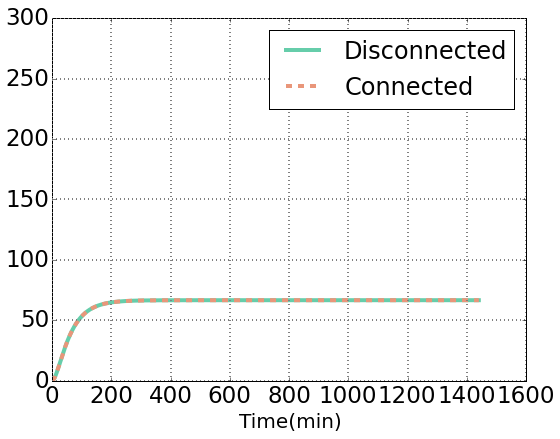

In [31]:
#Fast association rate

t=np.arange(0,1440,0.01)

kon=100*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d4=d;
k=0.09/50; k2=0.8; a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5
kon2=kon;koff2=koff;


xo = [0, 0]
def f_1_50(x,t): 
    return (((k2*x[1]))-d*x[0],
            a+k*S-d2*x[1])
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d4*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_zero_00_S_50_deg_100kon.eps',format="eps")
show()

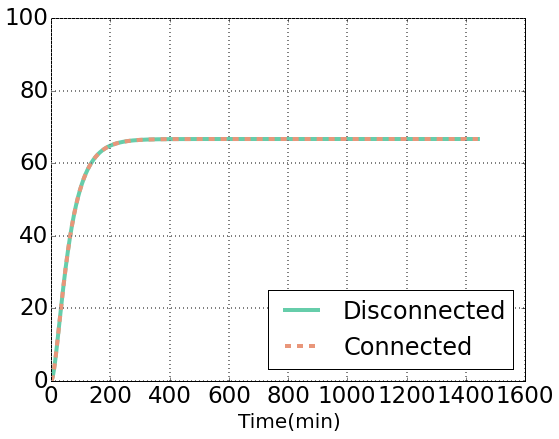

In [32]:
import numpy as np
t=np.arange(0,1440,0.01)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
kon=100*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d4=d;
k=0.09/50; k2=0.8; a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5
kon2=kon;koff2=koff;

from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0]
def f_1_50(x,t): 
    return (((k2*x[1]))-d*x[0],
            a+k*S-d2*x[1])
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d4*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23)
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=4)
fig.savefig('Total_A_zero_00_S_50_deg_100kon_100_scale.eps',format="eps")
show()

/Users/LPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


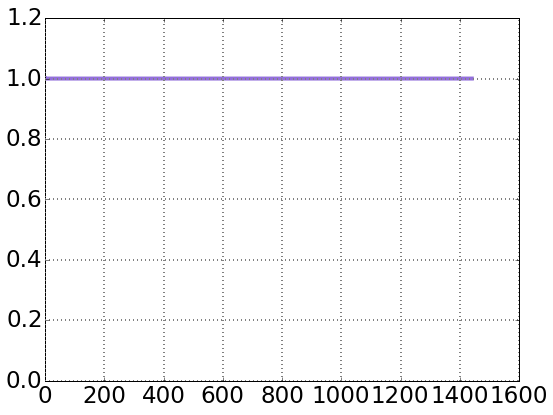

In [33]:
#Fast association rate ratio
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/(soln_1_50[:,0])
b1=cosa
pylab.ylim([0,1.2])
plot(t,cosa, color = '#9370db', lw=4)
#xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_00_S_50_deg_ratio_100kon.eps',format="eps")
show()

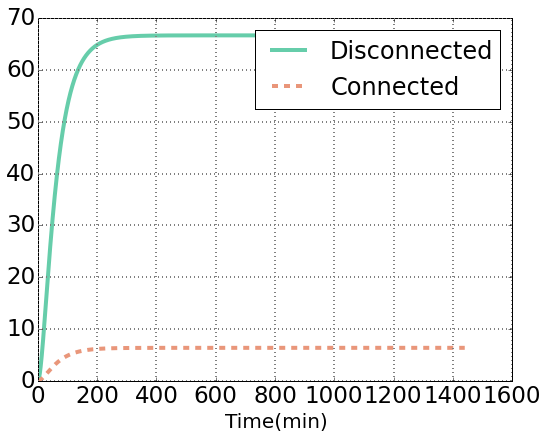

In [34]:
#Fast association rate only potentially binding protein (functional)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Free_A_zero_00_S_50_deg_100kon.eps',format="eps")
show()

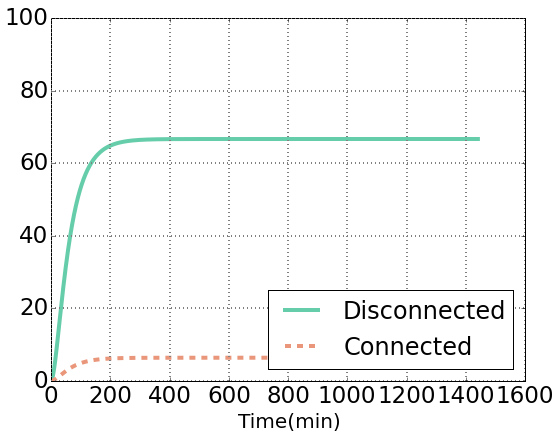

In [35]:
#Fast association rate only potentially binding protein (functional) scaled to 100

pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=4)
fig.savefig('Free_A_zero_00_S_50_deg_100kon_100_scale.eps',format="eps")
show()

/Users/LPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


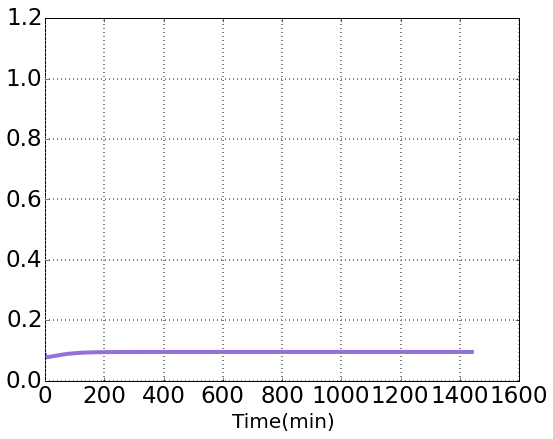

In [36]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0])/(soln_1_50[:,0])
pylab.ylim([0,1.2])
f1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Free_A_00_S_50_deg_ratio_100kon_12.eps',format="eps")
show()

# Total A without degradation of complex between TF and binding site

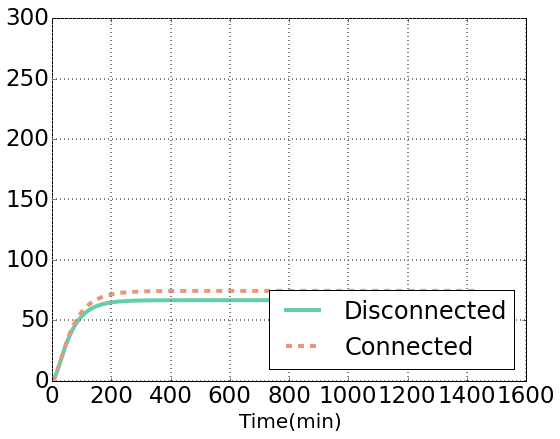

In [37]:
import numpy as np
t=np.arange(0,1440,0.01)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3;
k=0.09/50; k2=0.8; a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5
kon2=kon;koff2=koff;

from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0]
def f_1_50(x,t): 
    return (((k2*x[1]))-d*x[0],
            a+k*S-d2*x[1],)
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0])
soln_1R_50=odeint(f_1R_50,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=4)
fig.savefig('Total_A_zero_00_S_50_non_deg_retrocompl.eps',format="eps")
show()

/Users/LPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


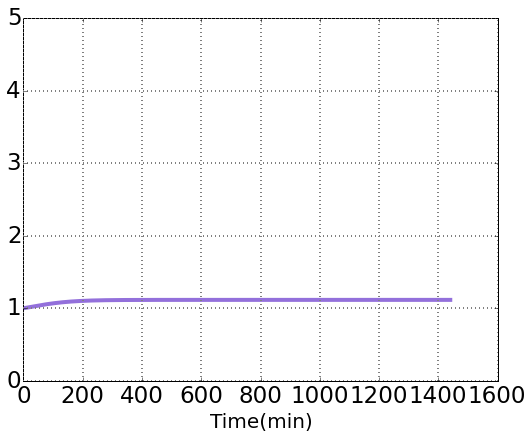

In [38]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/soln_1_50[:,0]
pylab.ylim([0,5])
a2=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_zero_00_S_50_non_deg_retro_complex_ratio.eps',format="eps")
show()

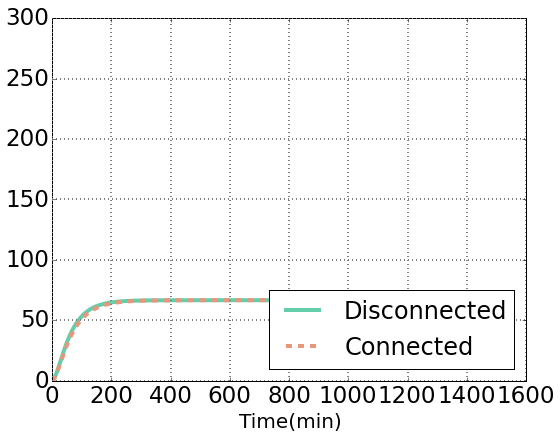

In [39]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=4)
fig.savefig('Free_A_zero_00_S_50_non_deg_retrocompl.eps',format="eps")
show()

/Users/LPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


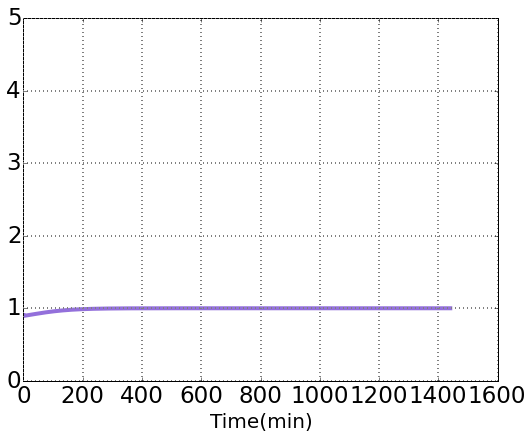

In [40]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0])/soln_1_50[:,0]
pylab.ylim([0,5])
c2=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Free_A_zero_00_S_50_non_deg_retro_complex_ratio.eps',format="eps")
show()

# Total A 100 kon without degradation of complex between TF and binding site

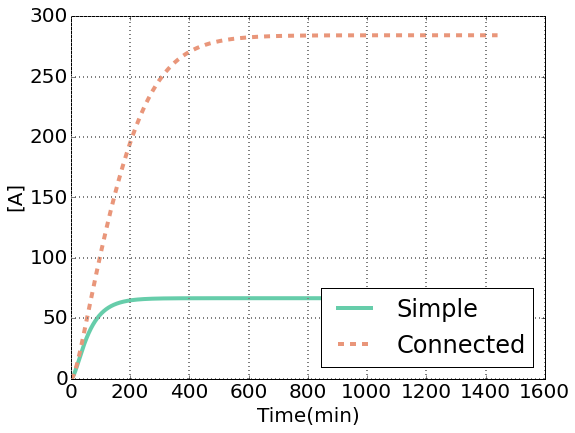

In [41]:
import numpy as np
t=np.arange(0,1440,0.01)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
kon=100*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3;d4=0;
k=0.09/50; k2=0.8; a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5
kon2=kon;koff2=koff;

from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0]
def f_1_50(x,t): 
    return (((k2*x[1]))-d*x[0],
            a+k*S-d2*x[1],)
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d4*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_zero_00_S_50_non_deg_100_kon_retrocompl.eps',format="eps")
show()

/Users/LPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


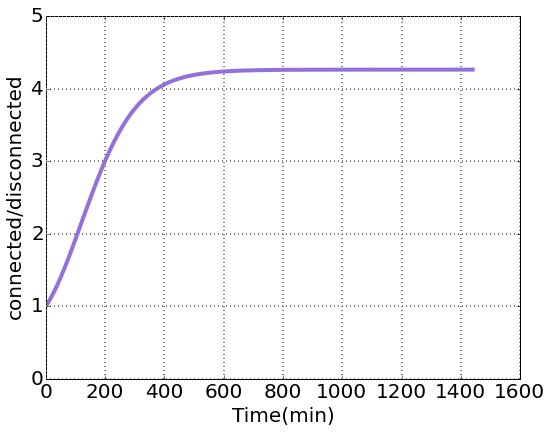

In [42]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/soln_1_50[:,0]
pylab.ylim([0,5])
b2=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_zero_00_S_50_non_deg_retro_100_kon_complex_ratio.eps',format="eps")
show()

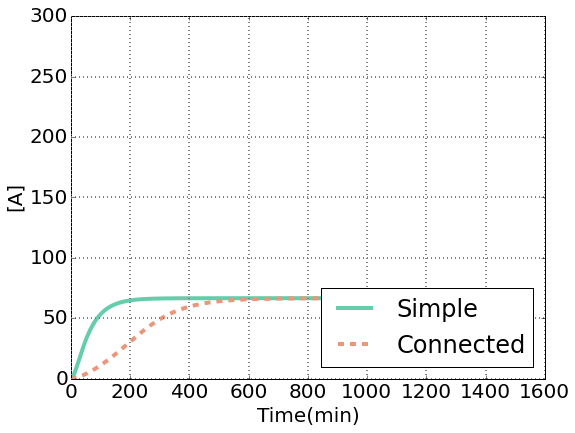

In [43]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_zero_00_S_50_non_deg_100_kon_retrocompl.eps',format="eps")
show()

/Users/LPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


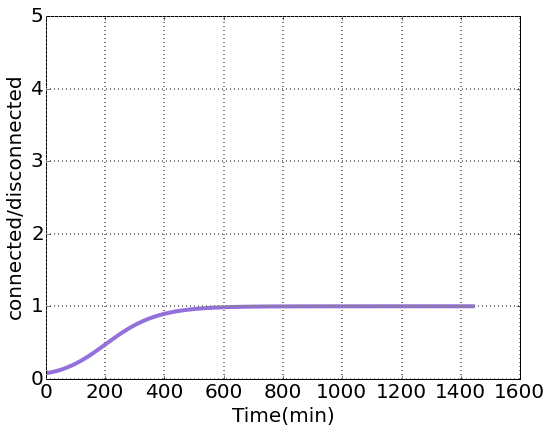

In [44]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0])/(soln_1_50[:,0])
pylab.ylim([0,5])
f2=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Free_A_zero_00_S_50_non_deg_retro_100_kon_complex_ratio.eps',format="eps")
show()

In [45]:
size(d2)

1

# Total A with half the rate of degradation of the complex between TF and binding site

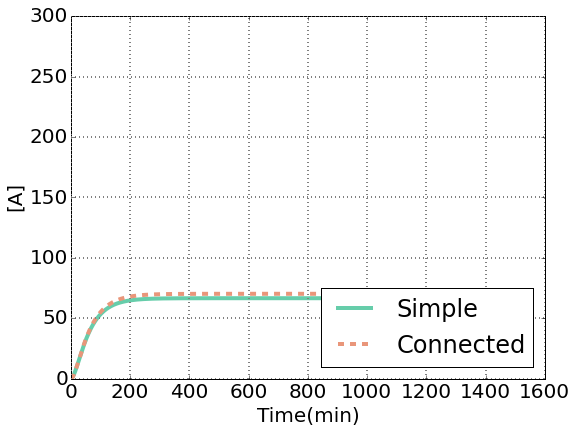

In [46]:

t=np.arange(0,1440,0.01)

from pylab import *
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=0.02; d4=0.5*d;#Half degradation
k=0.09/50; k2=0.8; a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5
kon2=kon;koff2=koff;

from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0]
def f_1_50(x,t): 
    return (((k2*x[1]))-d*x[0],
            a+k*S-d2*x[1],)
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d4*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_zero_00_S_50_deg_05.eps',format="eps")
show()

/Users/LPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


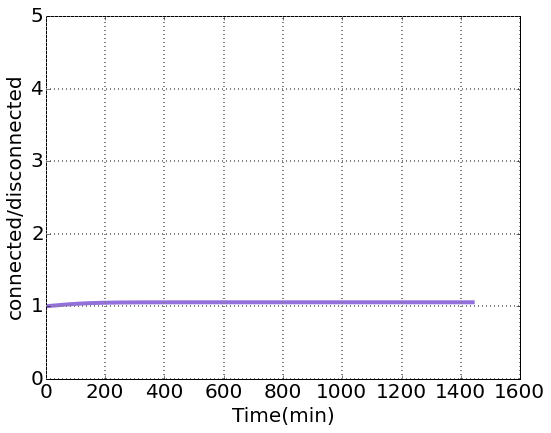

In [47]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/soln_1_50[:,0]
pylab.ylim([0,5])
a3=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_zero_00_S_50_05_deg_retro_complex_ratio.eps',format="eps")
show()

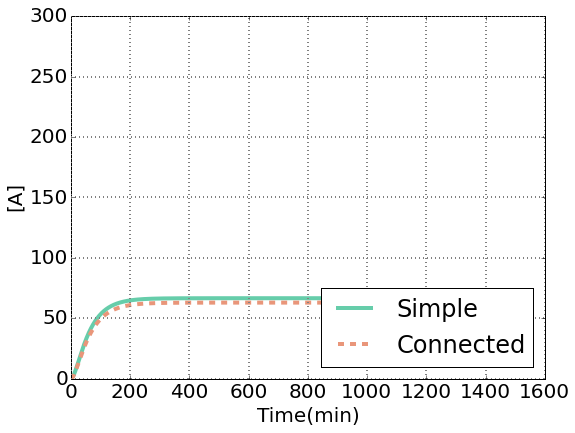

In [48]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_zero_00_S_50_deg_05.eps',format="eps")
show()

/Users/LPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


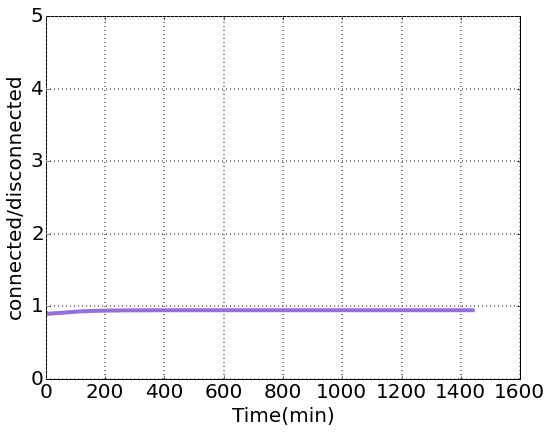

In [49]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0])/soln_1_50[:,0]
pylab.ylim([0,5])
c3=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Free_A_zero_00_S_50_05_deg_retro_complex_ratio.eps',format="eps")
show()

# Total A with half the rate of degradation of the complex between TF and binding site and kon=100kon

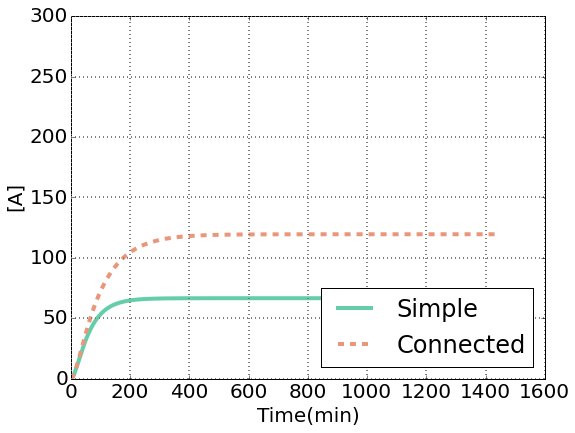

In [50]:

t=np.arange(0,1440,0.01)

kon=100*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d4=0.5*d #Half degradation
k=0.09/50; k2=0.8; a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5
kon2=kon;koff2=koff;

from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0]
def f_1_50(x,t): 
    return (((k2*x[1]))-d*x[0],
            a+k*S-d2*x[1],)
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d4*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_zero_00_S_50_05_deg_100_kon_retrocompl.eps',format="eps")
show()

/Users/LPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


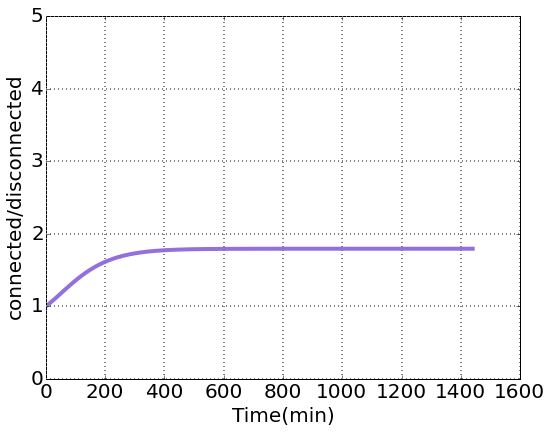

In [51]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/soln_1_50[:,0]
pylab.ylim([0,5])
b3=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_zero_00_S_50_05_deg_100kon_retro_complex_ratio.eps',format="eps")
show()

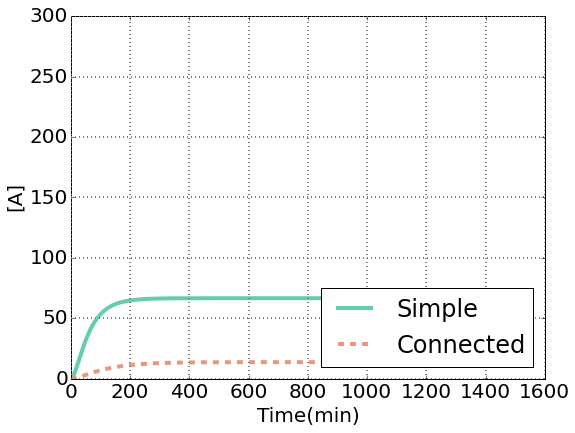

In [52]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_zero_00_S_50_05_deg_100_kon_retrocompl.eps',format="eps")
show()

/Users/LPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


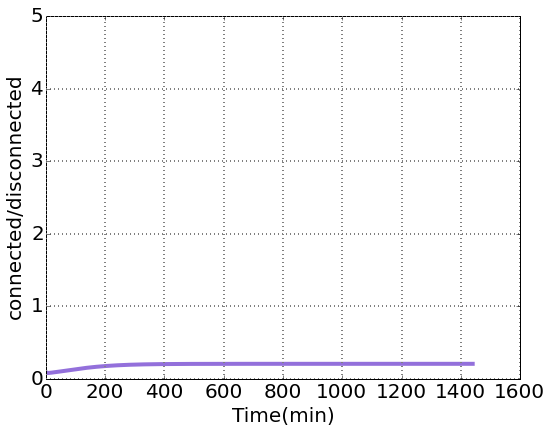

In [53]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa= (soln_1R_50[:,0])/(soln_1_50[:,0])
pylab.ylim([0,5])
f3=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Free_A_zero_00_S_50_05_deg_100kon_retro_complex_ratio.eps',format="eps")
show()

# 

# Total A with a quarter the rate of degradation of the complex between TF and binding site

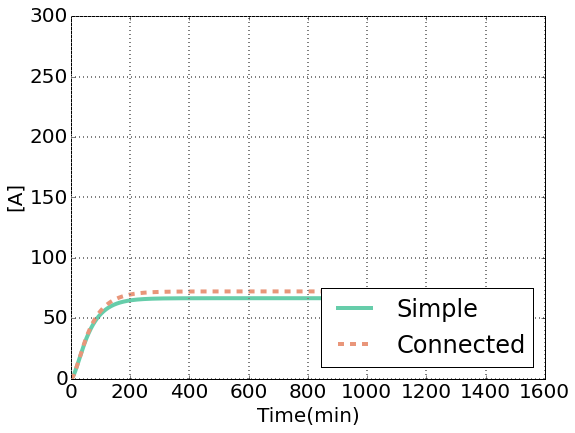

In [54]:

t=np.arange(0,1440,0.01)

kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=0.02; d4=0.25*d;
k=0.09/50; k2=0.8; a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5
kon2=kon;koff2=koff;

from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0]
def f_1_50(x,t): 
    return (((k2*x[1]))-d*x[0],
            a+k*S-d2*x[1],)
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d4*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_zero_00_S_50_deg_025.eps',format="eps")
show()

/Users/LPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


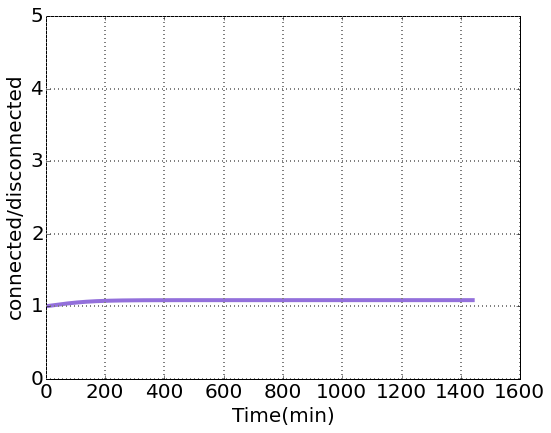

In [55]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/soln_1_50[:,0]
pylab.ylim([0,5])
a4=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_zero_00_S_50_025_deg_retro_complex_ratio.eps',format="eps")
show()

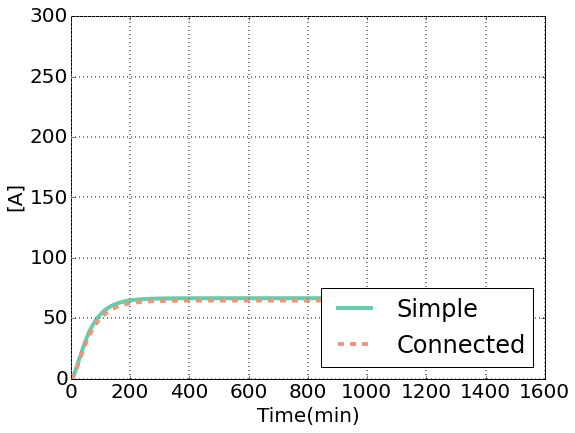

In [56]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_zero_00_S_50_deg_025.eps',format="eps")
show()

/Users/LPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


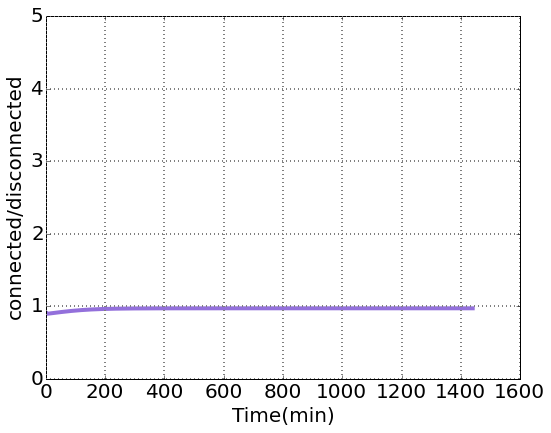

In [57]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0])/soln_1_50[:,0]
pylab.ylim([0,5])
c4=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Free_A_zero_00_S_50_025_deg_retro_complex_ratio.eps',format="eps")
show()

# Total A with a quarter the rate of degradation of the complex between TF and binding site and kon=100kon

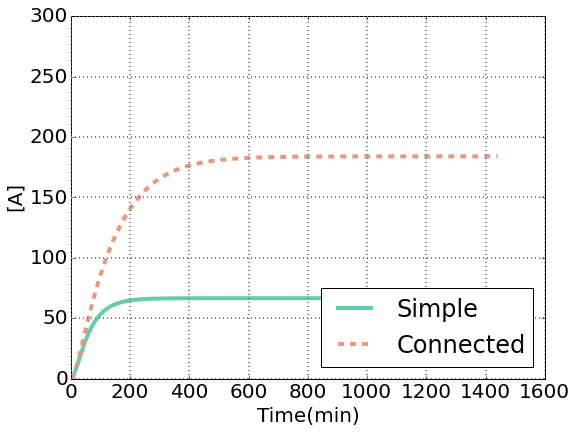

In [58]:

t=np.arange(0,1440,0.01)

kon=100*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=0.02; d4=0.25*d;
k=0.09/50; k2=0.8; a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5
kon2=kon;koff2=koff;

from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0]
def f_1_50(x,t): 
    return (((k2*x[1]))-d*x[0],
            a+k*S-d2*x[1],)
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d4*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_zero_00_S_50_deg_025_100_kon.eps',format="eps")
show()

/Users/LPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


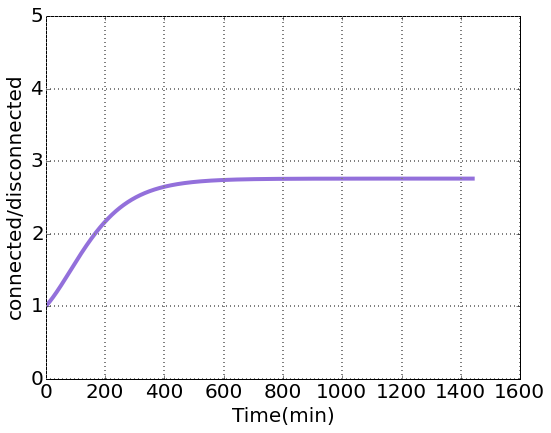

In [59]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/soln_1_50[:,0]
pylab.ylim([0,5])
b4=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_zero_00_S_50_025_deg_retro_complex_ratio_kon100.eps',format="eps")
show()

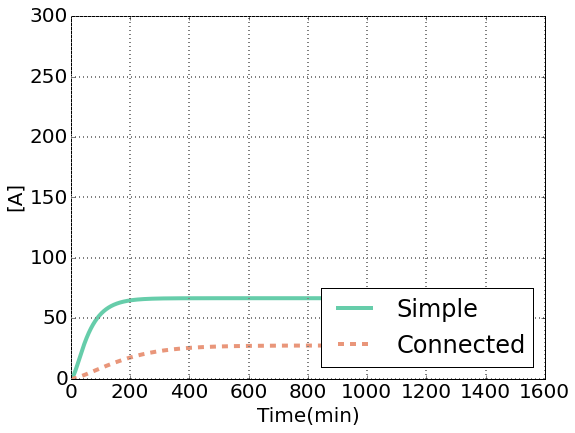

In [60]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_zero_00_S_50_deg_025_100_kon.eps',format="eps")
show()

/Users/LPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


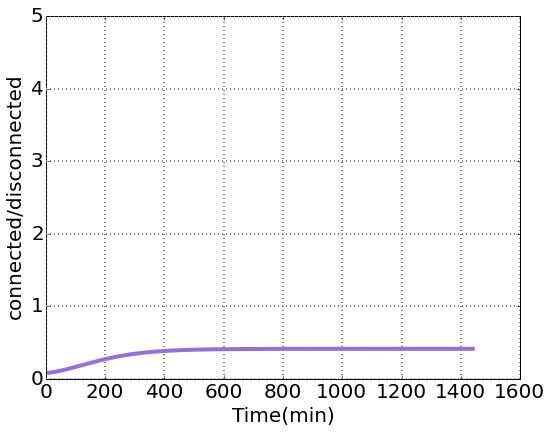

In [61]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa= (soln_1R_50[:,0])/(soln_1_50[:,0])
pylab.ylim([0,5])
f4=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Free_A_zero_00_S_50_025_deg_retro_complex_ratio_kon100.eps',format="eps")
show()

# Total A with double the rate of degradation of the complex between TF and binding site

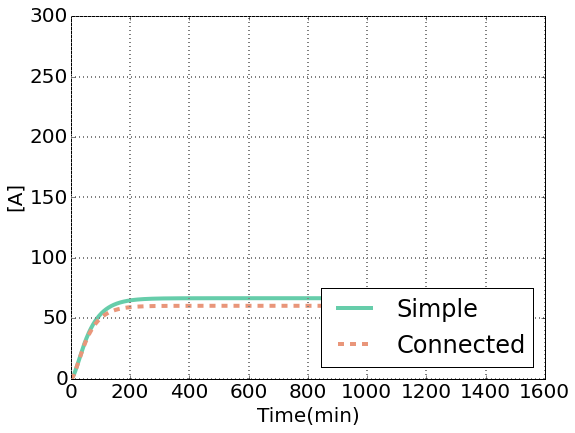

In [62]:
import numpy as np
t=np.arange(0,1440,0.01)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=0.02; d4=2*d;
k=0.09/50; k2=0.8; a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5
kon2=kon;koff2=koff;

from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0]
def f_1_50(x,t): 
    return (((k2*x[1]))-d*x[0],
            a+k*S-d2*x[1],)
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d4*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_zero_00_S_50_deg_2.eps',format="eps")
show()

/Users/LPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


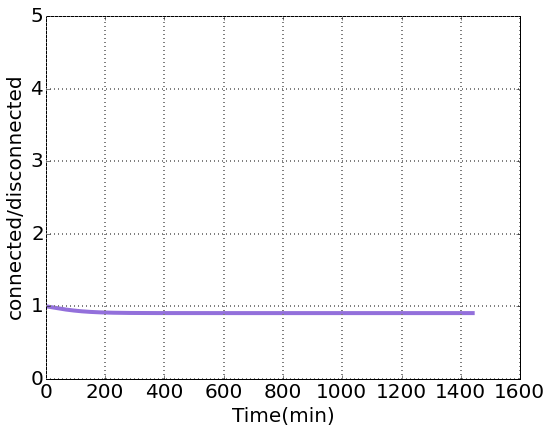

In [63]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/soln_1_50[:,0]
pylab.ylim([0,5])
a5=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_zero_00_S_50_2_deg_retro_complex_ratio.eps',format="eps")
show()

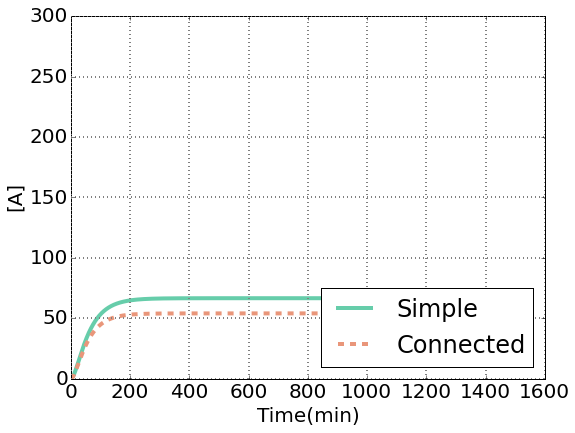

In [64]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_zero_00_S_50_deg_2.eps',format="eps")
show()

/Users/LPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


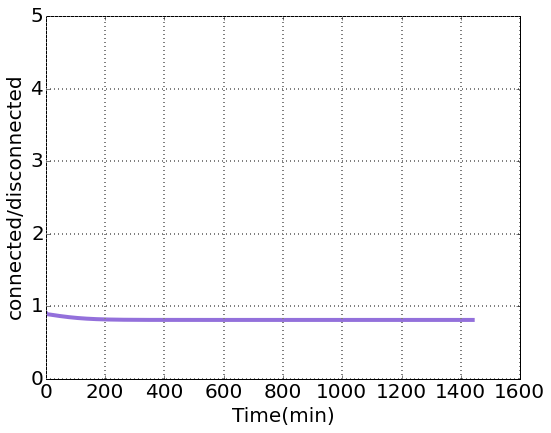

In [65]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0])/soln_1_50[:,0]
pylab.ylim([0,5])
c5=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Free_A_zero_00_S_50_2_deg_retro_complex_ratio.eps',format="eps")
show()

# Total A with double the rate of degradation of the complex between TF and binding site and kon=100kon

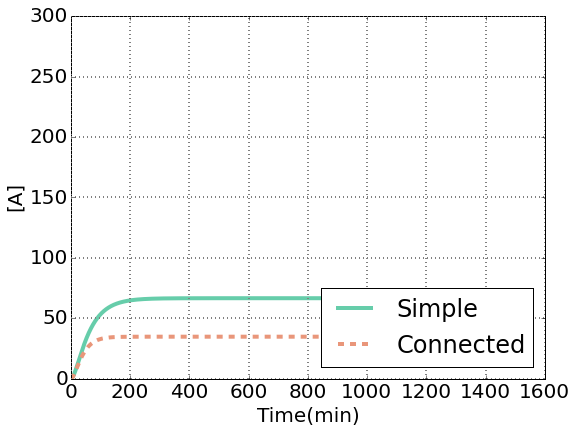

In [66]:
import numpy as np
t=np.arange(0,1440,0.01)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
kon=100*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=0.02; d4=2*d;
k=0.09/50; k2=0.8; a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5
kon2=kon;koff2=koff;

from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0]
def f_1_50(x,t): 
    return (((k2*x[1]))-d*x[0],
            a+k*S-d2*x[1],)
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d4*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_zero_00_S_50_deg_2_100_kon.eps',format="eps")
show()

/Users/LPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


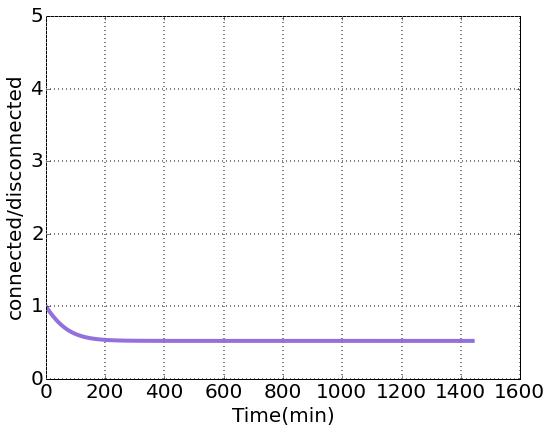

In [67]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/soln_1_50[:,0]
pylab.ylim([0,5])
b5=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_zero_00_S_50_2_deg_retro_complex_ratio_100_kon.eps',format="eps")
show()

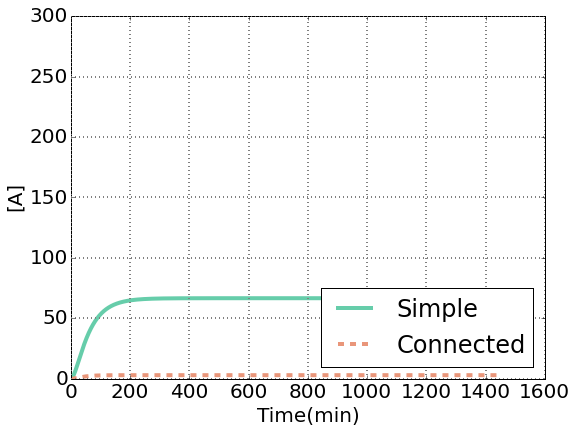

In [68]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_zero_00_S_50_deg_2_100_kon.eps',format="eps")
show()

/Users/LPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


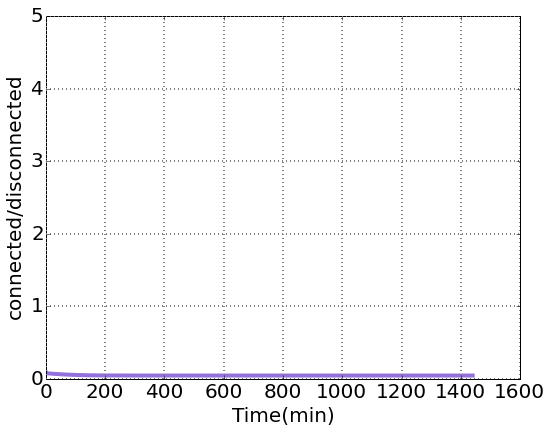

In [69]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0])/(soln_1_50[:,0])
pylab.ylim([0,5])
f5=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Free_A_zero_00_S_50_2_deg_retro_complex_ratio_100_kon.eps',format="eps")
show()

# Multiple ratios

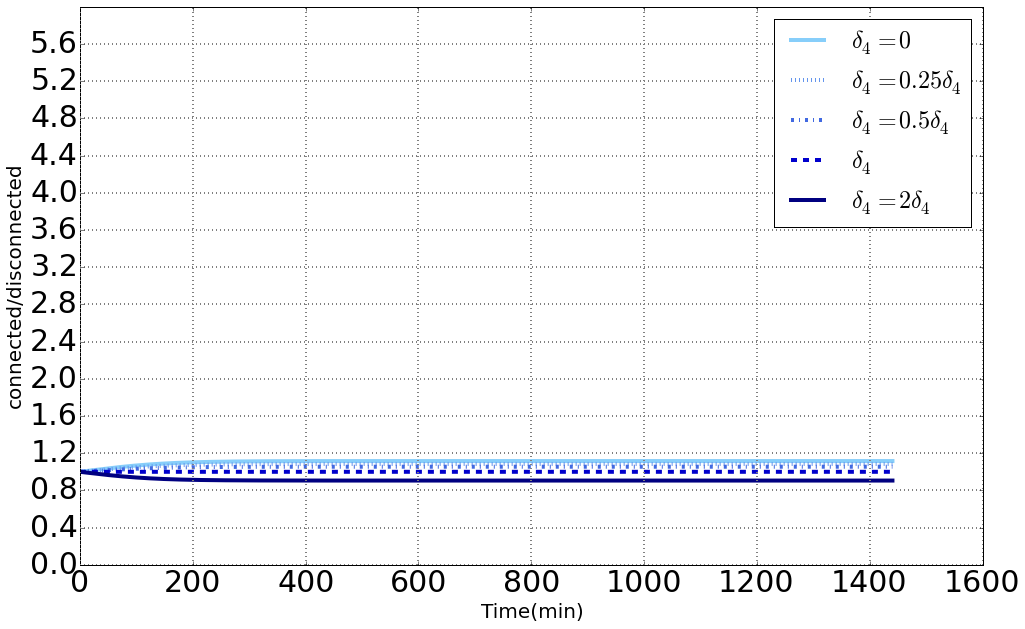

In [70]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)

from pylab import *
import matplotlib.pyplot  as pyplot
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a4, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a3, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,a2,color = '#87cefa', lw=4)
line2, =plot(t,a4, ":", color = '#6495ed',lw=4)
line3, =plot(t,a3, "-.", color = '#4169e1', lw=4)
line4, =plot(t,a1, "--", color = '#0000cd',lw=4)
line5, =plot(t,a5, color = '#000080',lw=4)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=1)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,6])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Total_A_ratios_kon_case_just_monomer_binding.eps',format="eps")
show()

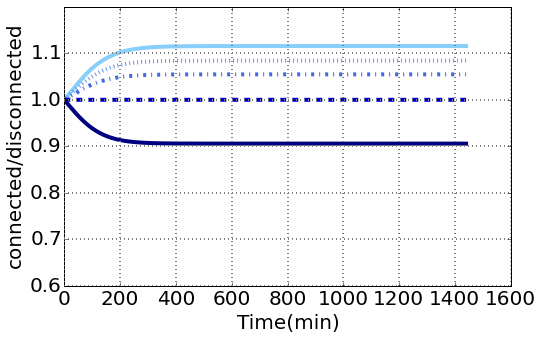

In [71]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(8,5)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a4, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a3, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,a2,color = '#87cefa', lw=4)
line2, =plot(t,a4, ":", color = '#6495ed',lw=4)
line3, =plot(t,a3, "-.", color = '#4169e1', lw=4)
line4, =plot(t,a1, "--", color = '#0000cd',lw=4)
line5, =plot(t,a5, color = '#000080',lw=4)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0.6,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Total_A_Mini_ratios_kon_case_just_monomer_binding.eps',format="eps")
show()

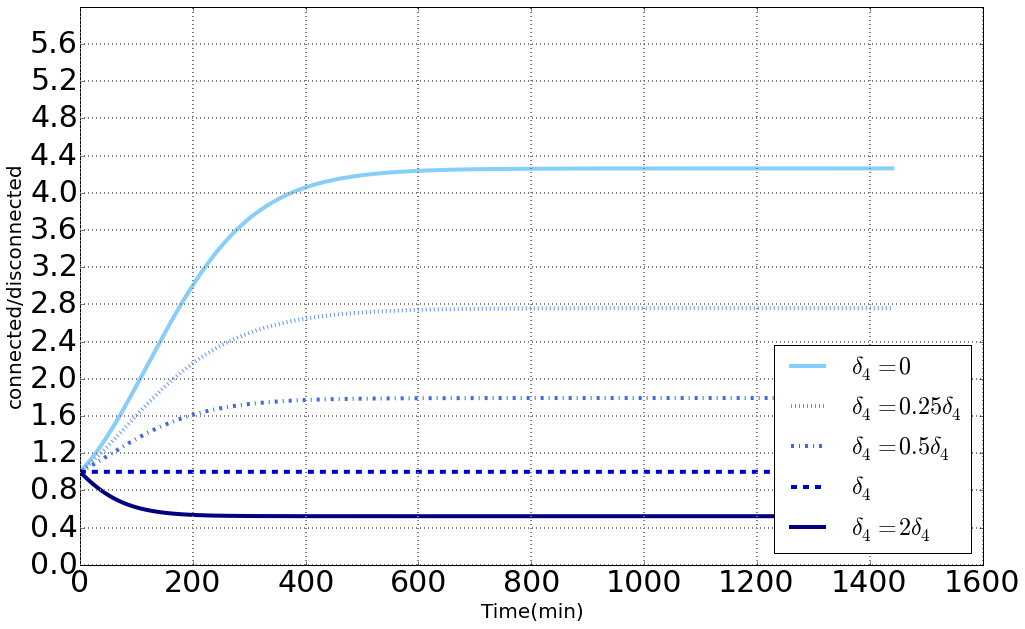

In [72]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,b2,color = '#87cefa', lw=4)
line2, =plot(t,b4, ":", color = '#6495ed',lw=4)
line3, =plot(t,b3, "-.", color = '#4169e1', lw=4)
line4, =plot(t,b1, "--", color = '#0000cd',lw=4)
line5, =plot(t,b5, color = '#000080',lw=4)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=4)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,6])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Total_A_ratios_100kon_case_just_monomer_bimding.eps',format="eps")
show()

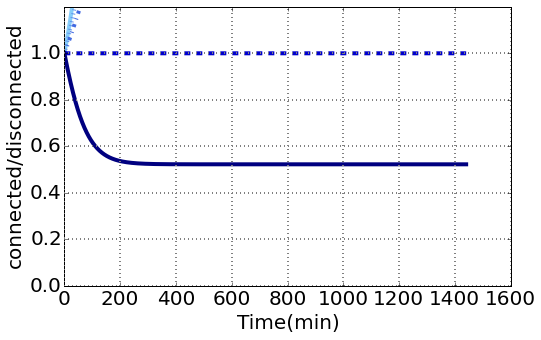

In [73]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(8,5)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,b2,color = '#87cefa', lw=4)
line2, =plot(t,b4, ":", color = '#6495ed',lw=4)
line3, =plot(t,b3, "-.", color = '#4169e1', lw=4)
line4, =plot(t,b1, "--", color = '#0000cd',lw=4)
line5, =plot(t,b5, color = '#000080',lw=4)


xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.2))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Total_A_Miniratios_100kon_case_just_monomer_binding.eps',format="eps")
show()

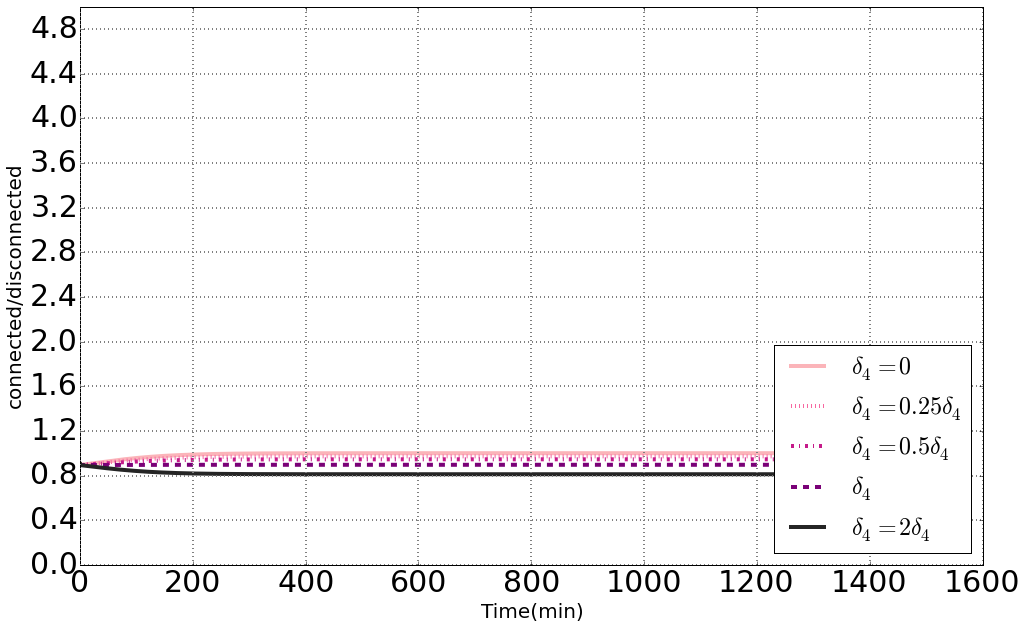

In [74]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,c2,color = '#FBB4B9', lw=4)
line2, =plot(t,c4, ":", color = '#F768A1',lw=4)
line3, =plot(t,c3, "-.", color = '#C51B8A', lw=4)
line4, =plot(t,c1, "--", color = '#7A0177',lw=4)
line5, =plot(t,c5, color = '#252525',lw=4)


legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=4)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,5])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Functional_A_ratios_case_just_monomer_binding.eps',format="eps")
show()

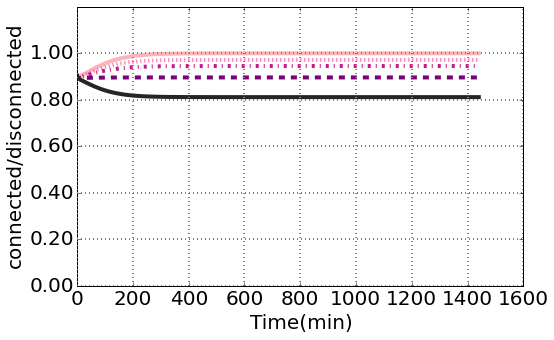

In [75]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)

from pylab import *
import matplotlib.pyplot  as pyplot
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(8,5)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,c2,color = '#FBB4B9', lw=4)
line2, =plot(t,c4, ":", color = '#F768A1',lw=4)
line3, =plot(t,c3, "-.", color = '#C51B8A', lw=4)
line4, =plot(t,c1, "--", color = '#7A0177',lw=4)
line5, =plot(t,c5, color = '#252525',lw=4)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")



ax.set_ylim([0,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.2))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.02f'))

fig.savefig('Functional_A_Mini_ratios_case_just_monomer_binding.eps',format="eps")
show()

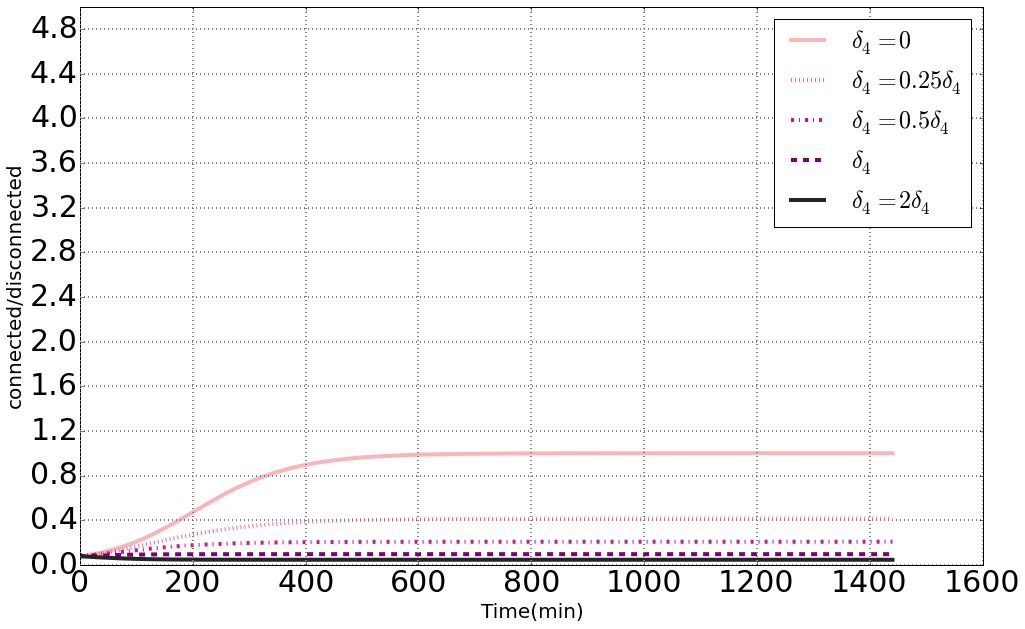

In [76]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)


line1, =plot(t,f2,color = '#FBB4B9', lw=4)
line2, =plot(t,f4, ":", color = '#F768A1',lw=4)
line3, =plot(t,f3, "-.", color = '#C51B8A', lw=4)
line4, =plot(t,f1, "--", color = '#7A0177',lw=4)
line5, =plot(t,f5, color = '#252525',lw=4)


legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=1)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,5])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Functional_A_ratios_100kon_case_just_monomer_binding.eps',format="eps")
show()

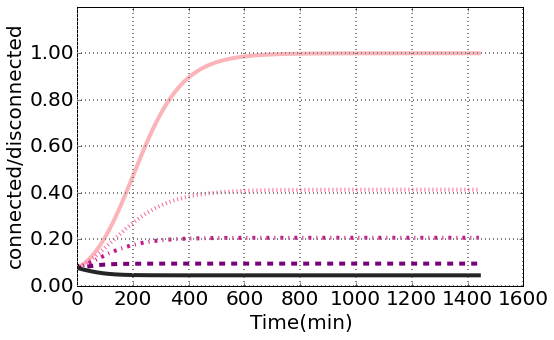

In [77]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(8,5)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

line1, =plot(t,f2,color = '#FBB4B9', lw=4)
line2, =plot(t,f4, ":", color = '#F768A1',lw=4)
line3, =plot(t,f3, "-.", color = '#C51B8A', lw=4)
line4, =plot(t,f1, "--", color = '#7A0177',lw=4)
line5, =plot(t,f5, color = '#252525',lw=4)


xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.2))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.02f'))

fig.savefig('Functional_A_Mini_ratios_100kon_case_just_monomer_binding.eps',format="eps")
show()